In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
#read train and test csv
train_df=pd.read_csv("/Users/taramathur/Downloads/Practise/Novartis_Challenge_Hacking_Prediction/data/train.csv")
train=train_df
test_df=pd.read_csv("/Users/taramathur/Downloads/Practise/Novartis_Challenge_Hacking_Prediction/data/test.csv")

In [3]:
test_df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

In [4]:
train_df.shape,test_df.shape

((23856, 18), (15903, 17))

In [5]:
train_df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [6]:
train_df.sample(10)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
17248,CR_152352,08-JUN-11,0,35,30,3,5,1,0,1,2,1,174,1.0,103,142,34,1
22505,CR_68858,01-JUN-00,0,25,25,9,0,6,4,1,2,1,316,1.0,98,29,34,1
20499,CR_29632,06-JUL-95,0,35,30,3,5,2,7,0,5,2,128,2.0,98,29,34,0
12530,CR_95494,03-JUL-03,0,37,37,0,0,2,7,1,6,1,0,1.0,98,29,34,1
10845,CR_29520,10-NOV-95,0,33,32,2,1,7,1,1,2,1,174,0.0,116,93,0,1
21224,CR_78360,20-JAN-01,0,33,32,2,1,7,1,0,5,1,174,0.0,103,93,43,1
226,CR_130028,22-MAR-08,0,21,23,4,1,2,7,1,5,1,249,1.0,103,142,34,1
16352,CR_117131,19-OCT-06,0,35,30,3,5,4,2,8,2,1,316,1.0,72,80,34,1
14441,CR_108634,13-JUN-05,0,25,25,9,0,3,5,2,6,3,249,3.0,103,87,34,1
11875,CR_176383,28-OCT-15,0,36,34,2,1,1,0,1,5,1,316,1.0,103,93,34,1


In [7]:
#check for null values
train_df.isnull().sum().sort_values(ascending=False),test_df.isnull().sum().sort_values(ascending=False)

(X_12                182
 MULTIPLE_OFFENSE      0
 X_6                   0
 DATE                  0
 X_1                   0
 X_2                   0
 X_3                   0
 X_4                   0
 X_5                   0
 X_7                   0
 X_15                  0
 X_8                   0
 X_9                   0
 X_10                  0
 X_11                  0
 X_13                  0
 X_14                  0
 INCIDENT_ID           0
 dtype: int64,
 X_12           127
 X_15             0
 X_6              0
 DATE             0
 X_1              0
 X_2              0
 X_3              0
 X_4              0
 X_5              0
 X_7              0
 X_14             0
 X_8              0
 X_9              0
 X_10             0
 X_11             0
 X_13             0
 INCIDENT_ID      0
 dtype: int64)

In [8]:
train_df.describe(),train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

(                X_1           X_2           X_3           X_4           X_5  \
 count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
 mean       0.483778     24.791206     24.637450      4.276744      2.455609   
 std        1.439738     15.240231     15.135093      2.944672      1.963095   
 min        0.000000      0.000000      0.000000      0.000000      0.000000   
 25%        0.000000      7.000000      8.000000      2.000000      1.000000   
 50%        0.000000     24.000000     24.000000      4.000000      3.000000   
 75%        0.000000     36.000000     35.000000      6.000000      5.000000   
 max        7.000000     52.000000     52.000000     10.000000      5.000000   
 
                 X_6           X_7           X_8           X_9          X_10  \
 count  23856.000000  23856.000000  23856.000000  23856.000000  23856.000000   
 mean       6.154175      4.876509      0.972460      4.924128      1.244802   
 std        4.471756      3.881931    

In [9]:
#checking for outlier
p=train_df['X_12']
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5*IQR)
 upper_range = Q3+(1.5*IQR)
 return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(p)
lowerbound,upperbound


(nan, nan)

In [10]:
#train_df['X_12'].fillna((train_df['X_12'].median()), inplace=True)
#fill null values with median
train_df['X_12'].fillna((train_df['X_12'].mean()), inplace=True)

In [11]:
#test_df['X_12'].fillna((test_df['X_12'].median()), inplace=True)
#fill null values with median
test_df['X_12'].fillna((test_df['X_12'].mean()), inplace=True)

In [12]:
train_df.isnull().sum().sort_values(ascending=False)

MULTIPLE_OFFENSE    0
X_15                0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
INCIDENT_ID         0
dtype: int64

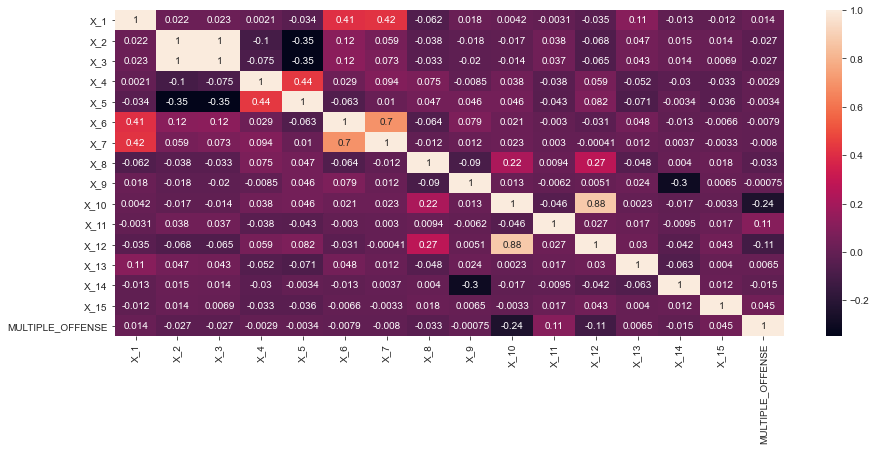

In [13]:
#plotting correlation matrix
corr_data = train_df.corr()
plt.figure(figsize=(15, 6))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.show()

In [14]:
# get top n correlated features
train_df1=train_df.drop(['INCIDENT_ID','DATE'],axis=1)

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df1, 10))

Top Absolute Correlations
X_2   X_3     0.996985
X_10  X_12    0.877471
X_6   X_7     0.695243
X_4   X_5     0.439616
X_1   X_7     0.421454
      X_6     0.409876
X_2   X_5     0.349190
X_3   X_5     0.347519
X_9   X_14    0.297295
X_8   X_12    0.272828
dtype: float64


In [15]:
data = train_df1[['X_2','X_3','X_10','X_12', 'X_6', 'X_7']]

In [16]:
#standarize the data
def standardize(data_features):
    data_features = (data_features - data_features.mean()) /data_features.std()
    return data_features

std_data = data.apply(standardize, axis=0)
std_data.head()

,X_2,X_3,X_10,X_12,X_6,X_7
0,0.735474,0.618599,-0.21871,0.022296,-0.258103,0.289416
1,0.801090,0.816814,-0.21871,0.022296,1.083651,3.123057
2,-1.429847,-1.495693,-0.21871,0.022296,-1.152606,-1.256207
3,0.538627,0.486456,-0.21871,0.022296,0.189148,-0.998603
4,0.538627,0.486456,-0.21871,-0.837356,0.412774,-0.483396


In [17]:
#The variance inflation factor (VIF) quantifies the extent of correlation between one 
#predictor and the other predictors in a model. 
#It is used for diagnosing collinearity/multicollinearity. 
#Value lies between 4-5
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns
vif

,VIF_Factor,features
0,173.371977,X_2
1,173.374680,X_3
2,4.422116,X_10
3,4.445376,X_12
4,1.989519,X_6
5,2.013487,X_7


In [18]:
# drop X_2 , X_3 as very highly correlated
std_data.drop(['X_2','X_3'], axis=1, inplace=True)

In [19]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns
vif

,VIF_Factor,features
0,4.395811,X_10
1,4.401334,X_12
2,1.956220,X_6
3,1.939000,X_7


In [20]:
train_df=train_df.drop(['X_2','X_3'],axis=1)
test_df=test_df.drop(['X_2','X_3'],axis=1)

In [21]:
train_df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9',
       'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE'],
      dtype='object')

In [22]:
train_df.head(10)

,INCIDENT_ID,DATE,X_1,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,2,1,8,3,0,5,1,174,0.0,112,29,43,1
5,CR_96263,07-APR-03,0,10,3,1,0,1,6,1,303,1.0,72,62,34,1
6,CR_131400,22-JAN-08,0,7,3,7,1,0,5,1,174,0.0,112,29,43,1
7,CR_11981,14-MAY-93,0,7,3,9,8,0,5,1,316,1.0,72,62,34,1
8,CR_184134,21-AUG-16,0,6,5,8,3,1,1,1,316,1.0,103,14,34,1
9,CR_32634,25-AUG-96,1,6,5,15,10,0,5,2,145,1.0,103,29,34,0


In [23]:
X = train_df.drop(['MULTIPLE_OFFENSE', 'DATE', 'INCIDENT_ID'], axis=1)
eval_X = test_df.drop(['DATE','INCIDENT_ID'], axis=1)
Y = train_df['MULTIPLE_OFFENSE']

incident_ids_train = train['INCIDENT_ID']
incident_ids_eval = test_df['INCIDENT_ID']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(15267, 13) (15267,)
(3817, 13) (3817,)
(4772, 13) (4772,)


In [25]:
Y.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_cv = pd.DataFrame(scaler.transform(X_cv), columns=X_cv.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
eval_X = pd.DataFrame(scaler.transform(eval_X), columns=eval_X.columns)

In [29]:
 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve,GridSearchCV
import sklearn.metrics as metrics

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['MULTIPLE_OFFENSE'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validate(alg, dtrain[predictors], dtrain['MULTIPLE_OFFENSE'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['MULTIPLE_OFFENSE'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['MULTIPLE_OFFENSE'], dtrain_predprob))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.999
AUC Score (Train): 0.999974


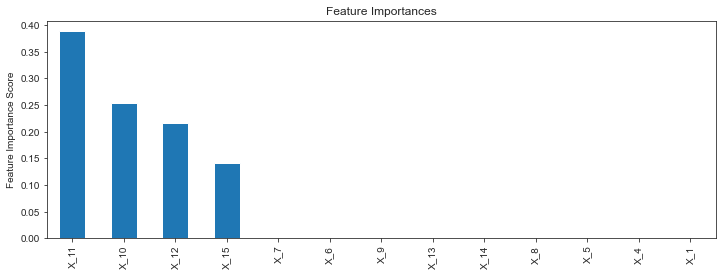

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
predictors = [x for x in X_train.columns]# if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [31]:
# grid search 'n_estimators' parameter for GradientBoostingClassifier
predictors = [x for x in X_train.columns]# if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train['MULTIPLE_OFFENSE'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': range(20, 81, 10)}, scoring='roc_auc')

In [33]:
print('Best score: {}'.format(gsearch1.best_score_))
print('Best parameters: {}'.format(gsearch1.best_params_))

Best score: 0.9996340783304978
Best parameters: {'n_estimators': 80}


In [34]:
# grid search 'max_depth' parameter for GradientBoostingClassifier
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train['MULTIPLE_OFFENSE'])
print('Best score: {}'.format(gsearch2.best_score_))
print('Best parameters: {}'.format(gsearch2.best_params_))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best score: 0.9998039347776336
Best parameters: {'max_depth': 15, 'min_samples_split': 400}


In [35]:
# grid search 'min_samples_split' parameter for GradientBoostingClassifier
param_test3 = {'min_samples_split':range(400,1000,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=15,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train['MULTIPLE_OFFENSE'])
print('Best score: {}'.format(gsearch3.best_score_))
print('Best parameters: {}'.format(gsearch3.best_params_))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best score: 0.9997481083762713
Best parameters: {'min_samples_leaf': 30, 'min_samples_split': 400}



Model Report
Accuracy : 0.9993
AUC Score (Train): 0.999989


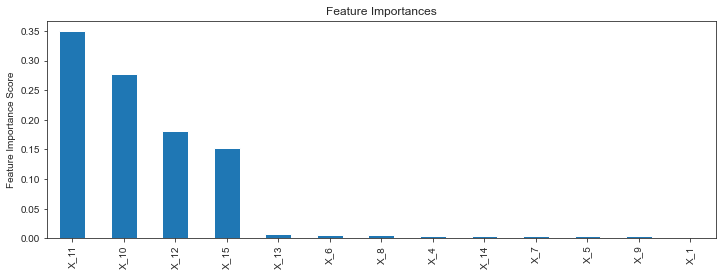

In [36]:
modelfit(gsearch3.best_estimator_, train, predictors)

In [37]:
# grid search 'max_features' parameter for GradientBoostingClassifier
param_test4 = {'max_features':range(2,13,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=15, min_samples_split=400, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train['MULTIPLE_OFFENSE'])
print('Best score: {}'.format(gsearch4.best_score_))
print('Best parameters: {}'.format(gsearch4.best_params_))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Best score: 0.9998114234332336
Best parameters: {'max_features': 6}


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0,learning_rate=0.1, min_samples_split=400,min_samples_leaf=30,max_depth=15,max_features=6,subsample=0.8)

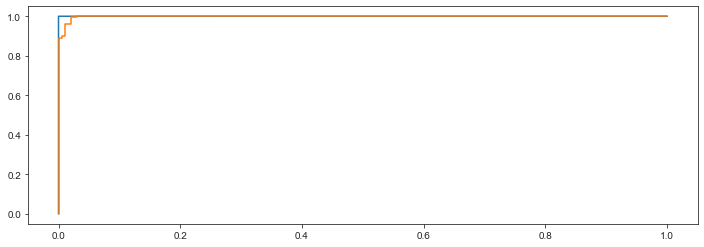

In [39]:
from sklearn.metrics import roc_curve, auc

GB.fit(X_train, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, GB.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr)
plt.plot(test_fpr, test_tpr)
plt.show()

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)
#y_pred = rf.predict(X_test)

#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# train_results = []
# test_results = []
# for estimator in n_estimators:
#    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#    rf.fit(X_train, y_train)
#    train_pred = rf.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(X_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
# line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("n_estimators")
# plt.show()

# max_depths = np.linspace(1, 32, 32, endpoint=True)
# train_results = []
# test_results = []
# for max_depth in max_depths:
#    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
#    rf.fit(X_train, y_train)
#    train_pred = rf.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(X_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
# line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("Tree depth")
# plt.show()

# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
# train_results = []
# test_results = []
# for min_samples_split in min_samples_splits:
#    rf = RandomForestClassifier(min_samples_split=min_samples_split)
#    rf.fit(X_train, y_train)
#    train_pred = rf.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(X_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
# line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel("AUC score")
# plt.xlabel("min samples splits")
# plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score

y_train_predict = GB.predict(X_train)
y_test_predict = GB.predict(X_test)

train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
test_confusion_matrix = confusion_matrix(y_test, y_test_predict)
print("Train Confusion Matrix")
print(train_confusion_matrix)
print("Test Confusion Matrix")
print(test_confusion_matrix)

print("Training recall Score")
print(recall_score(y_train, y_train_predict))
print("Test recall Score")
print(recall_score(y_test, y_test_predict))

Train Confusion Matrix
[[  679     1]
 [    0 14587]]
Test Confusion Matrix
[[ 190    8]
 [   3 4571]]
Training recall Score
1.0
Test recall Score
0.9993441189331002


In [41]:
results = GB.predict(eval_X)
results_df = pd.DataFrame({ 'MULTIPLE_OFFENSE': results, 'INCIDENT_ID': incident_ids_eval })
results_df = results_df[['INCIDENT_ID', 'MULTIPLE_OFFENSE']]
print(results_df.shape)
results_df.head()

(15903, 2)


,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [42]:
results_df.to_csv('submission10.csv', index=False)